In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Fruits_Train/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Fruits_Train/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 100 images belonging to 10 classes.
Found 30 images belonging to 3 classes.


In [50]:
classes = ['Tamarind', 'Star apple', 'Olives', 'Longan', 'Mangosteen', 'Fig', 'Dates', 'Breadfruit', 'Blackberries', 'Ambarella']

In [51]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'rmsprop', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [73]:

history=model.fit(train,steps_per_epoch=len(train),epochs=100,batch_size=8,verbose=1,
                  callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 2.2916 - accuracy: 0.1700WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 540ms/step - loss: 2.2916 - accuracy: 0.1700
Epoch 2/100
3/4 [=====================>........] - ETA: 0s - loss: 2.2447 - accuracy: 0.1562WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 357ms/step - loss: 2.2371 - accuracy: 0.1700
Epoch 3/100
3/4 [=====================>........] - ETA: 0s - loss: 2.3207 - accuracy: 0.1979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 361ms/step - loss: 2.3094 - accuracy: 0.2000
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 1.9655 - accuracy: 0.2900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 543ms/step - loss: 1.9655 - accuracy: 0.2900
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: 1.8174 - accuracy: 0.3700WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 374ms/step - loss: 1.8174 - accuracy: 0.3700
Epoch 6/100
4/4 [==============================] - ETA: 0s - loss: 1.7443 - accuracy: 0.4500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 538ms/step - loss: 1.7443 - accuracy: 0.4500
Epoch 7/100
4/4 [==============================] - ETA: 0s - loss: 2.1641 - accuracy: 0.3800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 383ms/step - loss: 2.1641 - accuracy: 0.3800
Epoch 8/100
4/4 [==============================] - ETA: 0s - loss: 1.6951 - accuracy: 0.4200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 374ms/step - loss: 1.6951 - accuracy: 0.4200
Epoch 9/100
3/4 [=====================>........] - ETA: 0s - loss: 1.2627 - accuracy: 0.5521WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 349ms/step - loss: 1.2823 - accuracy: 0.5300
Epoch 10/100
4/4 [==============================] - ETA: 0s - loss: 1.7591 - accuracy: 0.4300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 531ms/step - loss: 1.7591 - accuracy: 0.4300
Epoch 11/100
4/4 [==============================] - ETA: 0s - loss: 1.5641 - accuracy: 0.5300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 552ms/step - loss: 1.5641 - accuracy: 0.5300
Epoch 12/100
4/4 [==============================] - ETA: 0s - loss: 1.8747 - accuracy: 0.5000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 560ms/step - loss: 1.8747 - accuracy: 0.5000
Epoch 13/100
4/4 [==============================] - ETA: 0s - loss: 1.2757 - accuracy: 0.5800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 383ms/step - loss: 1.2757 - accuracy: 0.5800
Epoch 14/100
4/4 [==============================] - ETA: 0s - loss: 1.1643 - accuracy: 0.6700WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 389ms/step - loss: 1.1643 - accuracy: 0.6700
Epoch 15/100
4/4 [==============================] - ETA: 0s - loss: 1.0415 - accuracy: 0.6600WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 406ms/step - loss: 1.0415 - accuracy: 0.6600
Epoch 16/100
4/4 [==============================] - ETA: 0s - loss: 0.8061 - accuracy: 0.7000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 396ms/step - loss: 0.8061 - accuracy: 0.7000
Epoch 17/100
4/4 [==============================] - ETA: 0s - loss: 2.6533 - accuracy: 0.4400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 539ms/step - loss: 2.6533 - accuracy: 0.4400
Epoch 18/100
4/4 [==============================] - ETA: 0s - loss: 1.0884 - accuracy: 0.6000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 543ms/step - loss: 1.0884 - accuracy: 0.6000
Epoch 19/100
4/4 [==============================] - ETA: 0s - loss: 0.8160 - accuracy: 0.7000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 379ms/step - loss: 0.8160 - accuracy: 0.7000
Epoch 20/100
4/4 [==============================] - ETA: 0s - loss: 0.9128 - accuracy: 0.6800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 383ms/step - loss: 0.9128 - accuracy: 0.6800
Epoch 21/100
4/4 [==============================] - ETA: 0s - loss: 1.0210 - accuracy: 0.6300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 377ms/step - loss: 1.0210 - accuracy: 0.6300
Epoch 22/100
3/4 [=====================>........] - ETA: 0s - loss: 0.6211 - accuracy: 0.8438WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 348ms/step - loss: 0.6183 - accuracy: 0.8400
Epoch 23/100
4/4 [==============================] - ETA: 0s - loss: 0.7321 - accuracy: 0.8000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 536ms/step - loss: 0.7321 - accuracy: 0.8000
Epoch 24/100
4/4 [==============================] - ETA: 0s - loss: 2.6271 - accuracy: 0.6200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 530ms/step - loss: 2.6271 - accuracy: 0.6200
Epoch 25/100
4/4 [==============================] - ETA: 0s - loss: 0.5908 - accuracy: 0.7900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 532ms/step - loss: 0.5908 - accuracy: 0.7900
Epoch 26/100
3/4 [=====================>........] - ETA: 0s - loss: 0.4931 - accuracy: 0.8646WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 347ms/step - loss: 0.4810 - accuracy: 0.8700
Epoch 27/100
4/4 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.8400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 532ms/step - loss: 0.4702 - accuracy: 0.8400
Epoch 28/100
4/4 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.9100WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 374ms/step - loss: 0.2594 - accuracy: 0.9100
Epoch 29/100
4/4 [==============================] - ETA: 0s - loss: 0.1487 - accuracy: 0.9600WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 373ms/step - loss: 0.1487 - accuracy: 0.9600
Epoch 30/100
4/4 [==============================] - ETA: 0s - loss: 0.2815 - accuracy: 0.8600WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 540ms/step - loss: 0.2815 - accuracy: 0.8600
Epoch 31/100
4/4 [==============================] - ETA: 0s - loss: 0.3848 - accuracy: 0.8800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 394ms/step - loss: 0.3848 - accuracy: 0.8800
Epoch 32/100
4/4 [==============================] - ETA: 0s - loss: 0.1853 - accuracy: 0.9400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 563ms/step - loss: 0.1853 - accuracy: 0.9400
Epoch 33/100
4/4 [==============================] - ETA: 0s - loss: 0.4895 - accuracy: 0.8900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 400ms/step - loss: 0.4895 - accuracy: 0.8900
Epoch 34/100
4/4 [==============================] - ETA: 0s - loss: 0.8659 - accuracy: 0.7900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 369ms/step - loss: 0.8659 - accuracy: 0.7900
Epoch 35/100
3/4 [=====================>........] - ETA: 0s - loss: 0.2323 - accuracy: 0.9375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 352ms/step - loss: 0.2428 - accuracy: 0.9300
Epoch 36/100
4/4 [==============================] - ETA: 0s - loss: 1.5488 - accuracy: 0.7500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 374ms/step - loss: 1.5488 - accuracy: 0.7500
Epoch 37/100
4/4 [==============================] - ETA: 0s - loss: 0.2071 - accuracy: 0.9300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 542ms/step - loss: 0.2071 - accuracy: 0.9300
Epoch 38/100
4/4 [==============================] - ETA: 0s - loss: 0.2763 - accuracy: 0.9200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 382ms/step - loss: 0.2763 - accuracy: 0.9200
Epoch 39/100
4/4 [==============================] - ETA: 0s - loss: 0.2178 - accuracy: 0.9100WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 539ms/step - loss: 0.2178 - accuracy: 0.9100
Epoch 40/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0825 - accuracy: 0.9792WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 356ms/step - loss: 0.0832 - accuracy: 0.9800
Epoch 41/100
3/4 [=====================>........] - ETA: 0s - loss: 0.1072 - accuracy: 0.9583WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 355ms/step - loss: 0.1036 - accuracy: 0.9600
Epoch 42/100
3/4 [=====================>........] - ETA: 0s - loss: 0.1490 - accuracy: 0.9479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 356ms/step - loss: 0.1432 - accuracy: 0.9500
Epoch 43/100
4/4 [==============================] - ETA: 0s - loss: 0.0773 - accuracy: 0.9700WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 558ms/step - loss: 0.0773 - accuracy: 0.9700
Epoch 44/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0917 - accuracy: 0.9583WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 365ms/step - loss: 0.0881 - accuracy: 0.9600
Epoch 45/100
4/4 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.9900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 552ms/step - loss: 0.1136 - accuracy: 0.9900
Epoch 46/100
4/4 [==============================] - ETA: 0s - loss: 1.5838 - accuracy: 0.7800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 561ms/step - loss: 1.5838 - accuracy: 0.7800
Epoch 47/100
3/4 [=====================>........] - ETA: 0s - loss: 0.2100 - accuracy: 0.9479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 373ms/step - loss: 0.2033 - accuracy: 0.9500
Epoch 48/100
3/4 [=====================>........] - ETA: 0s - loss: 0.7685 - accuracy: 0.8750WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 369ms/step - loss: 0.7382 - accuracy: 0.8800
Epoch 49/100
4/4 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 395ms/step - loss: 0.1532 - accuracy: 0.9500
Epoch 50/100
4/4 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 408ms/step - loss: 0.0882 - accuracy: 0.9800
Epoch 51/100
4/4 [==============================] - ETA: 0s - loss: 0.1915 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 377ms/step - loss: 0.1915 - accuracy: 0.9800
Epoch 52/100
4/4 [==============================] - ETA: 0s - loss: 0.0846 - accuracy: 0.9900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 560ms/step - loss: 0.0846 - accuracy: 0.9900
Epoch 53/100
4/4 [==============================] - ETA: 0s - loss: 0.2802 - accuracy: 0.9100WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 559ms/step - loss: 0.2802 - accuracy: 0.9100
Epoch 54/100
4/4 [==============================] - ETA: 0s - loss: 0.6619 - accuracy: 0.8900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 388ms/step - loss: 0.6619 - accuracy: 0.8900
Epoch 55/100
4/4 [==============================] - ETA: 0s - loss: 0.1680 - accuracy: 0.9600WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 384ms/step - loss: 0.1680 - accuracy: 0.9600
Epoch 56/100
4/4 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 0.9500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 556ms/step - loss: 0.0883 - accuracy: 0.9500
Epoch 57/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0385 - accuracy: 0.9896WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 362ms/step - loss: 0.0371 - accuracy: 0.9900
Epoch 58/100
4/4 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 387ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 59/100
4/4 [==============================] - ETA: 0s - loss: 0.1761 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 387ms/step - loss: 0.1761 - accuracy: 0.9800
Epoch 60/100
4/4 [==============================] - ETA: 0s - loss: 0.3030 - accuracy: 0.9200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 547ms/step - loss: 0.3030 - accuracy: 0.9200
Epoch 61/100
4/4 [==============================] - ETA: 0s - loss: 0.1789 - accuracy: 0.9500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 554ms/step - loss: 0.1789 - accuracy: 0.9500
Epoch 62/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0175 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 358ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 63/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 381ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 64/100
3/4 [=====================>........] - ETA: 0s - loss: 0.4185 - accuracy: 0.9271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 381ms/step - loss: 0.4120 - accuracy: 0.9200
Epoch 65/100
4/4 [==============================] - ETA: 0s - loss: 0.1889 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 397ms/step - loss: 0.1889 - accuracy: 0.9800
Epoch 66/100
3/4 [=====================>........] - ETA: 0s - loss: 0.1653 - accuracy: 0.9583WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 353ms/step - loss: 0.1591 - accuracy: 0.9600
Epoch 67/100
4/4 [==============================] - ETA: 0s - loss: 0.4264 - accuracy: 0.9200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 407ms/step - loss: 0.4264 - accuracy: 0.9200
Epoch 68/100
4/4 [==============================] - ETA: 0s - loss: 0.1195 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 386ms/step - loss: 0.1195 - accuracy: 0.9800
Epoch 69/100
4/4 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 558ms/step - loss: 0.0375 - accuracy: 0.9800
Epoch 70/100
4/4 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 562ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 71/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 366ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 72/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 355ms/step - loss: 0.0153 - accuracy: 0.9900
Epoch 73/100
3/4 [=====================>........] - ETA: 0s - loss: 2.9756 - accuracy: 0.7292WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 367ms/step - loss: 2.8567 - accuracy: 0.7400
Epoch 74/100
4/4 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 374ms/step - loss: 0.0396 - accuracy: 0.9900
Epoch 75/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0107 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 357ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 76/100
4/4 [==============================] - ETA: 0s - loss: 0.1280 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 381ms/step - loss: 0.1280 - accuracy: 0.9800
Epoch 77/100
4/4 [==============================] - ETA: 0s - loss: 0.5643 - accuracy: 0.9100WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 380ms/step - loss: 0.5643 - accuracy: 0.9100
Epoch 78/100
4/4 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 379ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 79/100
4/4 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 400ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 80/100
4/4 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 564ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 81/100
4/4 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 545ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 82/100
4/4 [==============================] - ETA: 0s - loss: 2.5483 - accuracy: 0.8200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 540ms/step - loss: 2.5483 - accuracy: 0.8200
Epoch 83/100
3/4 [=====================>........] - ETA: 0s - loss: 0.2417 - accuracy: 0.9479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 363ms/step - loss: 0.2354 - accuracy: 0.9500
Epoch 84/100
4/4 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 402ms/step - loss: 0.0466 - accuracy: 0.9800
Epoch 85/100
4/4 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 376ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 539ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 87/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 365ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 88/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0063 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 354ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 89/100
4/4 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 377ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 90/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 351ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 91/100
4/4 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 549ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 536ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 93/100
4/4 [==============================] - ETA: 0s - loss: 3.7533 - accuracy: 0.7600WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 383ms/step - loss: 3.7533 - accuracy: 0.7600
Epoch 94/100
4/4 [==============================] - ETA: 0s - loss: 0.2864 - accuracy: 0.9200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 385ms/step - loss: 0.2864 - accuracy: 0.9200
Epoch 95/100
3/4 [=====================>........] - ETA: 0s - loss: 0.1216 - accuracy: 0.9479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 367ms/step - loss: 0.1168 - accuracy: 0.9500
Epoch 96/100
4/4 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9600WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 410ms/step - loss: 0.0882 - accuracy: 0.9600
Epoch 97/100
4/4 [==============================] - ETA: 0s - loss: 1.7637 - accuracy: 0.7900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 420ms/step - loss: 1.7637 - accuracy: 0.7900
Epoch 98/100
4/4 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 415ms/step - loss: 0.0475 - accuracy: 0.9900
Epoch 99/100
4/4 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 393ms/step - loss: 0.0262 - accuracy: 0.9900
Epoch 100/100
3/4 [=====================>........] - ETA: 0s - loss: 0.0117 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


4/4 [==============================] - 2s 365ms/step - loss: 0.0112 - accuracy: 1.0000


In [74]:
model.save('Fruits_CNN.h5')

In [75]:
from keras.models import load_model
models = load_model('Fruits_CNN.h5')

In [76]:
score = model.evaluate(train,verbose=1)
print('Train loss= ', score[0])
print('Train accuracy= ', score[1])

4/4 [==============================] - 2s 339ms/step - loss: 0.0070 - accuracy: 1.0000
Train loss=  0.007002200465649366
Train accuracy=  1.0


Blackberries


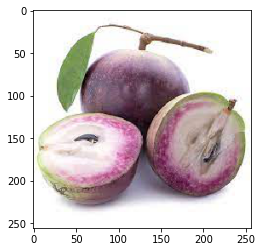

In [77]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/Star apple.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

Olives


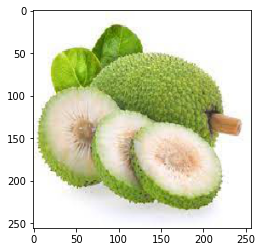

In [78]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/Breadfruit.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

Mangosteen


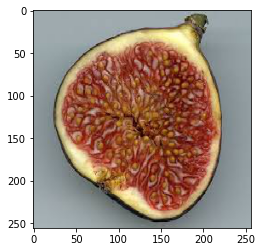

In [79]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/Fig.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

Ambarella


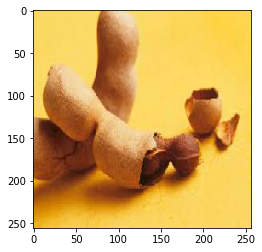

In [80]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/Tamarind.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])